In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [54]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [55]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [56]:
df.shape

(23486, 11)

In [57]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [58]:
df = df.dropna(subset=['Review Text'])

In [59]:
df.shape

(22641, 11)

In [60]:
df['Title'] = df['Title'].fillna("No Title")

C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_18960\1205680517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Title'] = df['Title'].fillna("No Title")


In [61]:
df[['Division Name', 'Department Name', 'Class Name']] = df[['Division Name', 'Department Name', 'Class Name']].fillna("Unknown")

C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_18960\3296939801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Division Name', 'Department Name', 'Class Name']] = df[['Division Name', 'Department Name', 'Class Name']].fillna("Unknown")


In [62]:
df.isnull().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [63]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Rafid
[nltk_data]     Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

In [19]:
example = df['Review Text'][10]

In [21]:
tokens = nltk.word_tokenize(example)

# Sentiment Analysis Using Roberta

In [22]:
from transformers import AutoTokenizer

In [23]:
from transformers import AutoModelForSequenceClassification

In [24]:
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

## Encoded Text

In [30]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [34]:
!pip install ipywidgets

In [36]:
from tqdm import tqdm
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review Text']
    myid = row['Clothing ID']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 22641/22641 [00:33<00:00, 675.66it/s]


In [37]:
vaders = pd.DataFrame(res).T

In [39]:
vaders = vaders.reset_index().rename(columns={'index': 'Clothing ID'})
vaders = vaders.merge(df, how='left')

In [42]:
def assign_sentiment(row):
    if row['pos'] > row['neg'] and row['pos'] > row['neu']:
        return 'positive'
    elif row['neg'] > row['pos'] and row['neg'] > row['neu']:
        return 'negative'
    else:
        return 'neutral'

vaders['Sentiment_Label'] = df.apply(assign_sentiment, axis=1)

In [47]:
vaders['Sentiment_Label'].value_counts()

Sentiment_Label
neutral     21610
positive      995
Name: count, dtype: int64

In [49]:
vaders['neg'].max()

0.337

In [51]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

Device set to use cpu


In [64]:
def analyze_sentiment(text):
    result = sentiment_analyzer(text)
    return result[0]['label'], result[0]['score']

df['sentiment_label'], df['sentiment_score'] = zip(*df['Review Text'].apply(analyze_sentiment))

label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

df['sentiment_label'] = df['sentiment_label'].map(label_mapping)
print(df[['Review Text', 'sentiment_label', 'sentiment_score']].head())

                                         Review Text sentiment_label  \
0  Absolutely wonderful - silky and sexy and comf...        positive   
1  Love this dress!  it's sooo pretty.  i happene...        positive   
2  I had such high hopes for this dress and reall...         neutral   
3  I love, love, love this jumpsuit. it's fun, fl...        positive   
4  This shirt is very flattering to all due to th...        positive   

   sentiment_score  
0         0.987180  
1         0.990955  
2         0.380140  
3         0.993131  
4         0.992028  


C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_18960\1508832344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'], df['sentiment_score'] = zip(*df['Review Text'].apply(analyze_sentiment))
C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_18960\1508832344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'], df['sentiment_score'] = zip(*df['Review Text'].apply(analyze_sentiment))
C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_18960\1508832344.py:13: Setti

In [65]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment_label,sentiment_score
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive,0.987180
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive,0.990955
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral,0.380140
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive,0.993131
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive,0.992028


In [66]:
df['sentiment_label'].value_counts()

sentiment_label
positive    18922
negative     2468
neutral      1251
Name: count, dtype: int64

## Saving the result

In [67]:
import pickle

with open('sentiment_results.pkl', 'wb') as f:
    pickle.dump(df, f)

In [68]:
with open('sentiment_results.pkl', 'rb') as f:
    df = pickle.load(f)

In [69]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment_label,sentiment_score
0,0,767,33,No Title,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,positive,0.987180
1,1,1080,34,No Title,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,positive,0.990955
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,neutral,0.380140
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,positive,0.993131
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,positive,0.992028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,positive,0.991914
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,positive,0.547881
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,positive,0.803084
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,negative,0.390426


# EDA

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2500.0, '2500'),
  Text(0, 5000.0, '5000'),
  Text(0, 7500.0, '7500'),
  Text(0, 10000.0, '10000'),
  Text(0, 12500.0, '12500'),
  Text(0, 15000.0, '15000'),
  Text(0, 17500.0, '17500'),
  Text(0, 20000.0, '20000')])

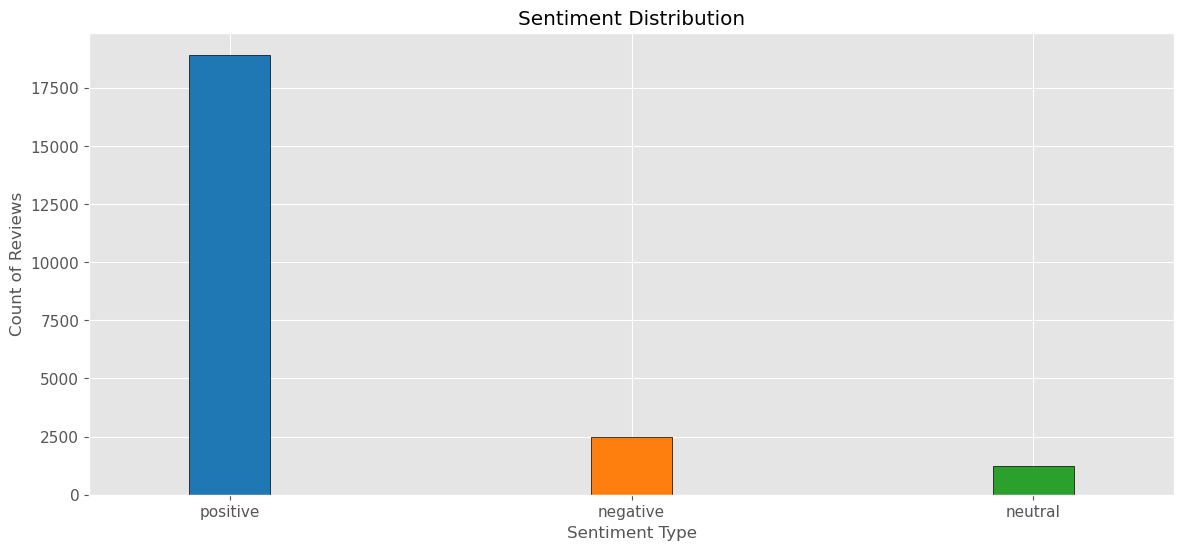

In [165]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
df['sentiment_label'].value_counts().plot(
    kind='bar',
    title='Sentiment Distribution',
    figsize=(14, 6),
    width=0.2,
    color=colors,
    edgecolor='black' 
)
plt.xlabel('Sentiment Type', fontsize=12)
plt.ylabel('Count of Reviews', fontsize=12)
plt.xticks(rotation=0, fontsize=11)  
plt.yticks(fontsize=11)

- So the majority of the reviews have positive reaction

- So the customers are happy in this company as the positive reviews are way too much

<Axes: title={'center': 'Positive reviewed Clasees'}, xlabel='Class Name'>

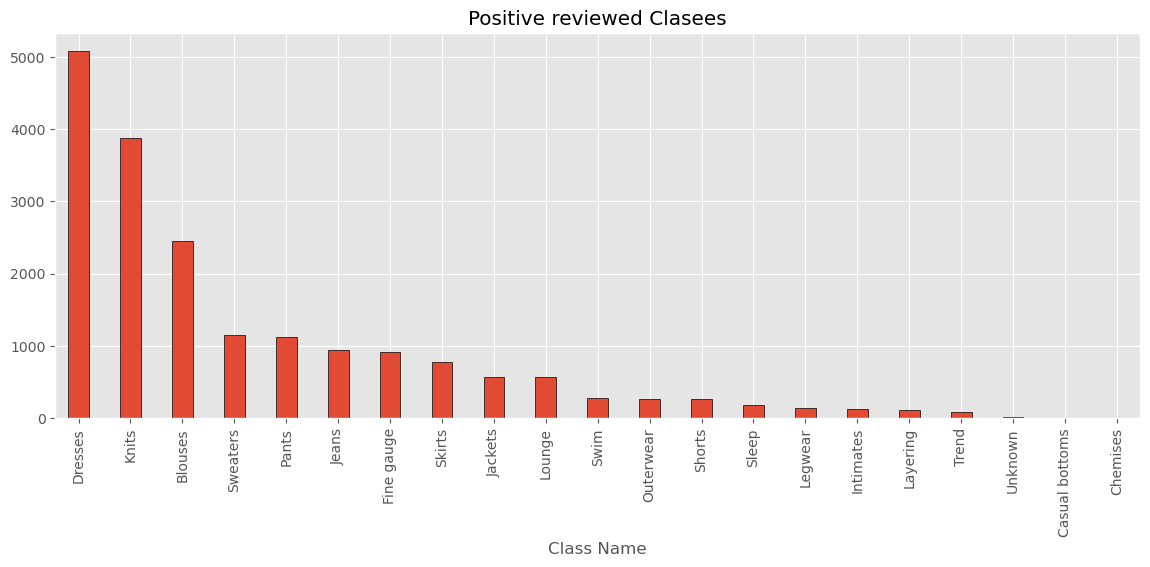

In [156]:
a = df[df['sentiment_label'] == 'positive']
b = a.groupby("Class Name")['Class Name'].count().sort_values(ascending=False)
b.plot(kind='bar',title='Positive reviewed Clasees', width=0.4,figsize=(14,5),edgecolor='black')

<Axes: title={'center': 'Negative reviewed Classes'}, xlabel='Class Name'>

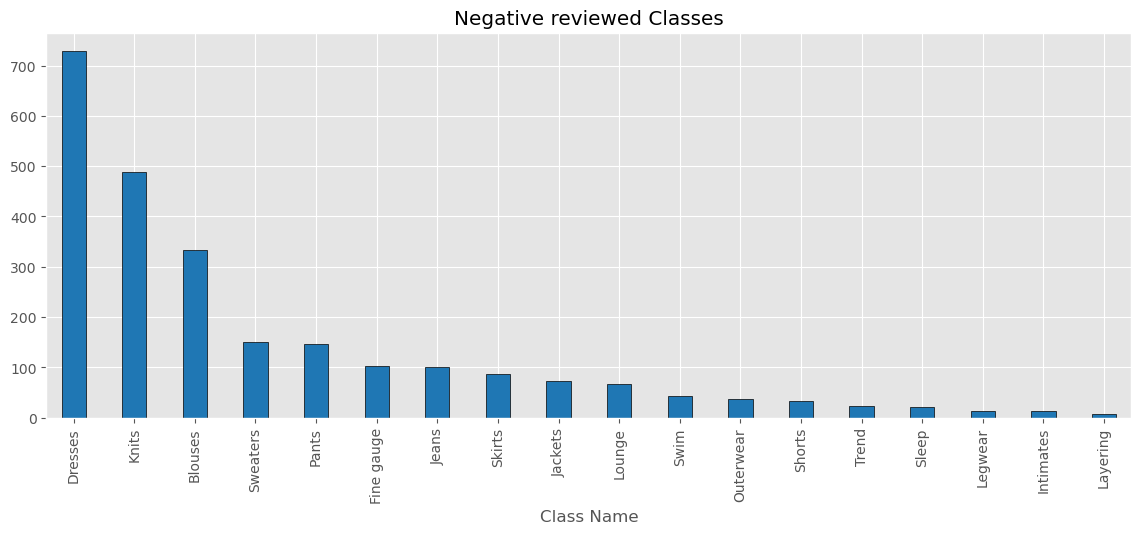

In [162]:
a = df[df['sentiment_label'] == 'negative']
b = a.groupby("Class Name")['Class Name'].count().sort_values(ascending=False)
b.plot(kind='bar',title='Negative reviewed Classes', width=0.4,figsize=(14,5),edgecolor='black',color='#1f77b4')

- So we can see that most of the positive reviews come from the dresses as people buy dresses more
- Also majority of the negative reviews came from the dresses as well

In [92]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Unknown', 'Casual bottoms', 'Chemises'], dtype=object)

<Axes: title={'center': 'Negative reviewed Clasees Percentage'}, xlabel='Class Name'>

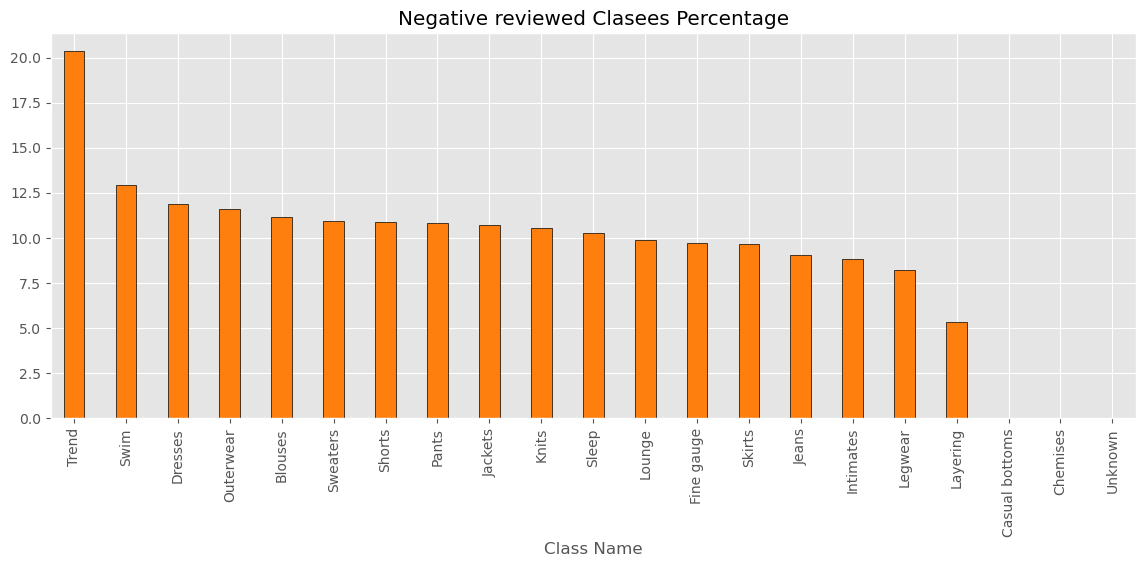

In [158]:
total_reviews_per_class = df.groupby("Class Name")['Class Name'].count()
a = df[df['sentiment_label'] == 'negative']
negative_reviews_per_class = a.groupby("Class Name")['Class Name'].count()
percentage_negative_reviews = (negative_reviews_per_class / total_reviews_per_class) * 100
percentage_negative_reviews.sort_values(ascending=False).plot(kind='bar',title='Negative reviewed Clasees Percentage', width=0.4,figsize=(14,5),edgecolor='black',color='#ff7f0e')

- We can see that, 20% of the trend class products have negative reviews, which is pretty high
- And layering class has the least negative review percentage, which is a good thing

<Axes: title={'center': 'Positive reviewed Clasees Percentage'}, xlabel='Class Name'>

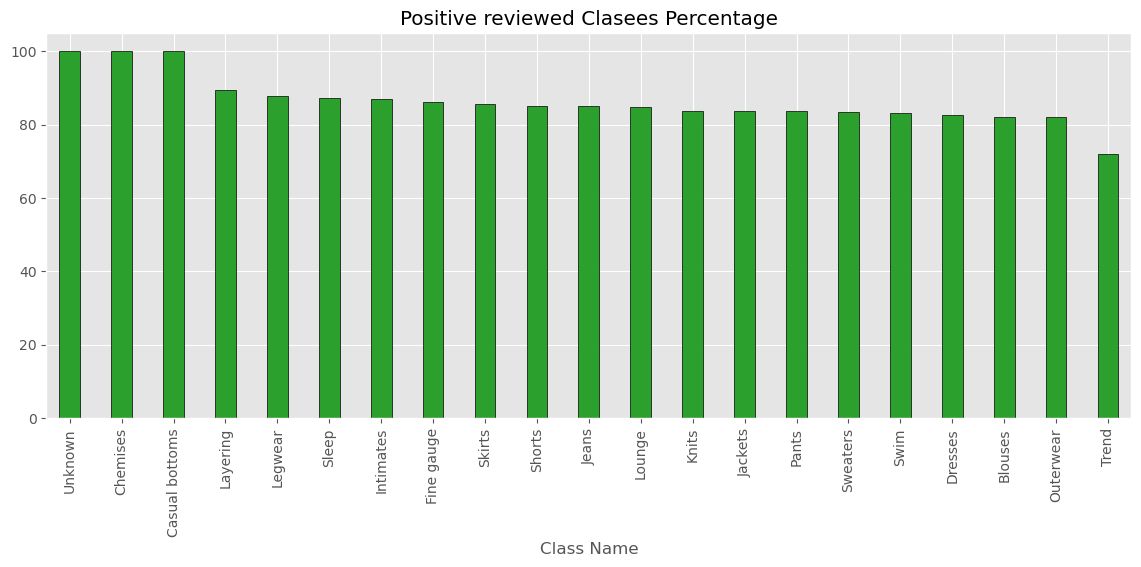

In [159]:
total_reviews_per_class = df.groupby("Class Name")['Class Name'].count()
a = df[df['sentiment_label'] == 'positive']
positive_reviews_per_class = a.groupby("Class Name")['Class Name'].count()
percentage_positive_reviews = (positive_reviews_per_class / total_reviews_per_class) * 100
percentage_positive_reviews.sort_values(ascending=False).plot(kind='bar',title='Positive reviewed Clasees Percentage', width=0.4,figsize=(14,5),edgecolor='black',color='#2ca02c')

- Chemises and Casual bottoms classes have the highest positive review percentage, which is 100%
- Means these product classes are doing really good job

<Axes: title={'center': 'Negative reviewed Department Percentage'}, xlabel='Department Name'>

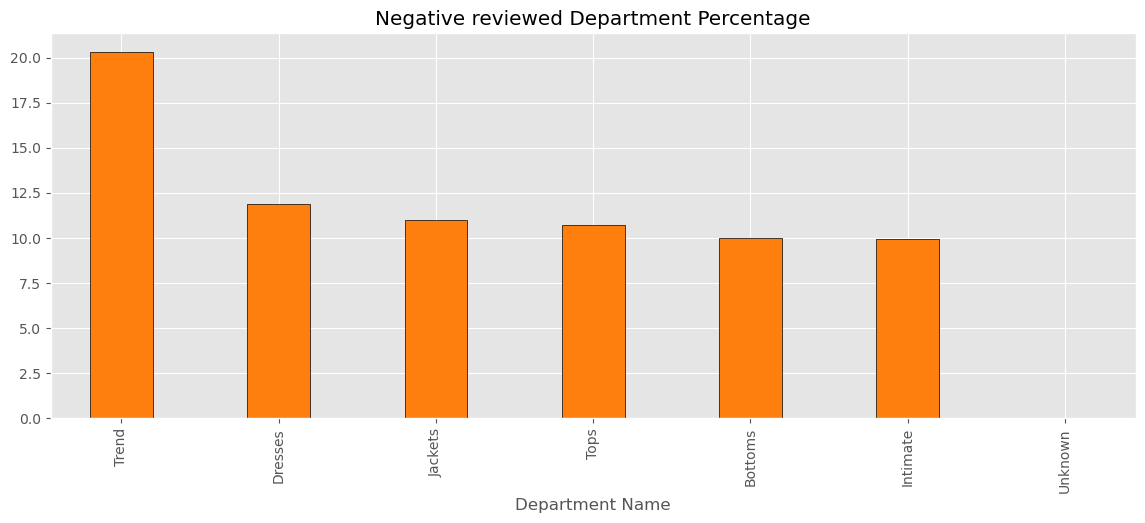

In [160]:
total_reviews_per_department = df.groupby("Department Name")['Department Name'].count()
a = df[df['sentiment_label'] == 'negative']
negative_reviews_per_department = a.groupby("Department Name")['Department Name'].count()
percentage_negative_reviews = (negative_reviews_per_department / total_reviews_per_department) * 100
percentage_negative_reviews.sort_values(ascending=False).plot(kind='bar',title='Negative reviewed Department Percentage', width=0.4,figsize=(14,5),edgecolor='black',color='#ff7f0e')

- Again the trend department has the highest negative review percentage

<Axes: title={'center': 'Positive reviewed Department Percentage'}, xlabel='Department Name'>

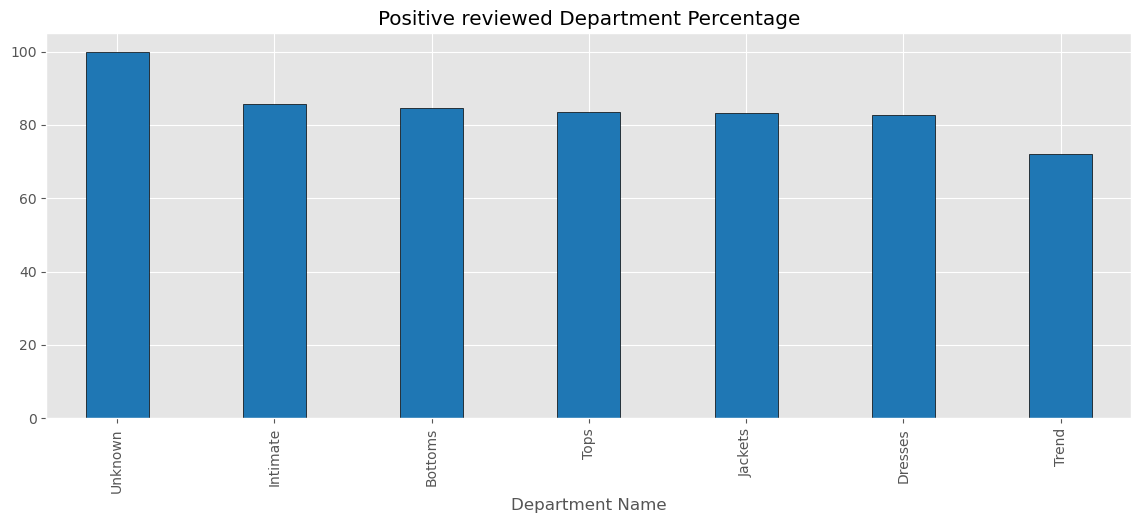

In [161]:
total_reviews_per_department = df.groupby("Department Name")['Department Name'].count()
a = df[df['sentiment_label'] == 'positive']
positive_reviews_per_department = a.groupby("Department Name")['Department Name'].count()
percentage_positive_reviews = (positive_reviews_per_department / total_reviews_per_department) * 100
percentage_positive_reviews.sort_values(ascending=False).plot(kind='bar',title='Positive reviewed Department Percentage', width=0.4,figsize=(14,5),edgecolor='black',color='#1f77b4')

- The products from intimate department has the highest positive percentage
- Means this department is doing well with the customers

# Extract certain words from Reviews

In [114]:
positive_reviews = df[df['sentiment_label'] == 'positive']['Review Text']
negative_reviews = df[df['sentiment_label'] == 'negative']['Review Text']

In [115]:
positive_reviews

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 18922, dtype: object

In [116]:
negative_reviews

10       Dress runs small esp where the zipper area run...
14       This is a nice choice for holiday gatherings. ...
22       First of all, this is not pullover styling. th...
27       The colors weren't what i expected either. the...
33       I ordered this 3 months ago, and it finally ca...
                               ...                        
23436    I'm 5'6" and it hits me at mid-thigh. the top ...
23449    I tried these on because the color is really p...
23462    The pattern of this skirt is adorable and look...
23478    I was surprised at the positive reviews for th...
23484    I bought this dress for a wedding i have this ...
Name: Review Text, Length: 2468, dtype: object

In [117]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [118]:
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Rafid
[nltk_data]     Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rafid
[nltk_data]     Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Pre-processing the reviews

In [119]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

In [120]:
positive_reviews_processed = positive_reviews.apply(preprocess_text)
negative_reviews_processed = negative_reviews.apply(preprocess_text)

In [121]:
positive_reviews_processed

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
5        [love, tracy, reese, dresses, one, petite, fee...
                               ...                        
23479    [wasnt, sure, ordering, skirt, couldnt, see, p...
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, worked, im...
23485    [dress, lovely, platinum, feminine, fits, perf...
Name: Review Text, Length: 18922, dtype: object

In [122]:
negative_reviews_processed

10       [dress, runs, small, esp, zipper, area, runs, ...
14       [nice, choice, holiday, gatherings, like, leng...
22       [first, pullover, styling, side, zipper, would...
27       [colors, werent, expected, either, dark, blue,...
33       [ordered, months, ago, finally, came, back, or...
                               ...                        
23436    [im, hits, midthigh, top, blackcamel, version,...
23449    [tried, color, really, pretty, fun, donset, wa...
23462    [pattern, skirt, adorable, looks, better, pers...
23478    [surprised, positive, reviews, product, terrib...
23484    [bought, dress, wedding, summer, cute, unfortu...
Name: Review Text, Length: 2468, dtype: object

### Find the frequency of words for both reviews

In [123]:
from collections import Counter

In [124]:
positive_words = [word for review in positive_reviews_processed for word in review]
negative_words = [word for review in negative_reviews_processed for word in review]

In [132]:
common_words = set(positive_words).intersection(set(negative_words))

In [133]:
positive_words_filtered = [word for word in positive_words if word not in common_words]
negative_words_filtered = [word for word in negative_words if word not in common_words]

In [134]:
positive_word_freq_filtered = Counter(positive_words_filtered)
negative_word_freq_filtered = Counter(negative_words_filtered)

positive_common_words_filtered = positive_word_freq_filtered.most_common(10)
negative_common_words_filtered = negative_word_freq_filtered.most_common(10)

In [135]:
positive_common_words_filtered

[('pleased', 183),
 ('comfort', 140),
 ('seasons', 137),
 ('covers', 110),
 ('pleasantly', 91),
 ('wonderfully', 86),
 ('dream', 85),
 ('whim', 83),
 ('occasion', 79),
 ('holds', 70)]

In [136]:
negative_common_words_filtered

[('bleach', 8),
 ('hideous', 6),
 ('plasticy', 3),
 ('middl', 3),
 ('tolerance', 3),
 ('unnatural', 3),
 ('splotchy', 3),
 ('horrendous', 3),
 ('wayyyy', 3),
 ('tablecloth', 3)]

### Using Vader for word extraction

In [137]:
def get_word_sentiment(word):
    return sia.polarity_scores(word)['compound']

In [138]:
negative_words_with_scores = [word for word in negative_words if get_word_sentiment(word) < 0]

In [141]:
negative_word_freq_with_scores = Counter(negative_words_with_scores).most_common(50)

### Remove the adjectives

In [145]:
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [146]:
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rafid Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Rafid
[nltk_data]     Mahmud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
def remove_adjectives_from_list(word_freq_list):
    words = [word for word, freq in word_freq_list]  
    pos_tags = pos_tag(words)  
    filtered_list = [(word, freq) for (word, freq), (_, tag) in zip(word_freq_list, pos_tags) if tag not in ['JJ', 'JJR', 'JJS']]
    
    return filtered_list

filtered_negative_word_freq = remove_adjectives_from_list(negative_word_freq_with_scores)
filtered_negative_word_freq

[('disappointed', 352),
 ('unfortunately', 258),
 ('cut', 243),
 ('sadly', 135),
 ('problem', 87),
 ('disappointing', 85),
 ('weird', 77),
 ('itchy', 61),
 ('disappointment', 52),
 ('ill', 52),
 ('worn', 50),
 ('shame', 34),
 ('bummer', 32),
 ('hate', 30),
 ('pay', 23),
 ('mess', 23),
 ('ruined', 23),
 ('missing', 22),
 ('lost', 20),
 ('miss', 19),
 ('blah', 19),
 ('badly', 18),
 ('mistake', 17),
 ('exposed', 17),
 ('falling', 15),
 ('problems', 14),
 ('bother', 14),
 ('seriously', 14)]

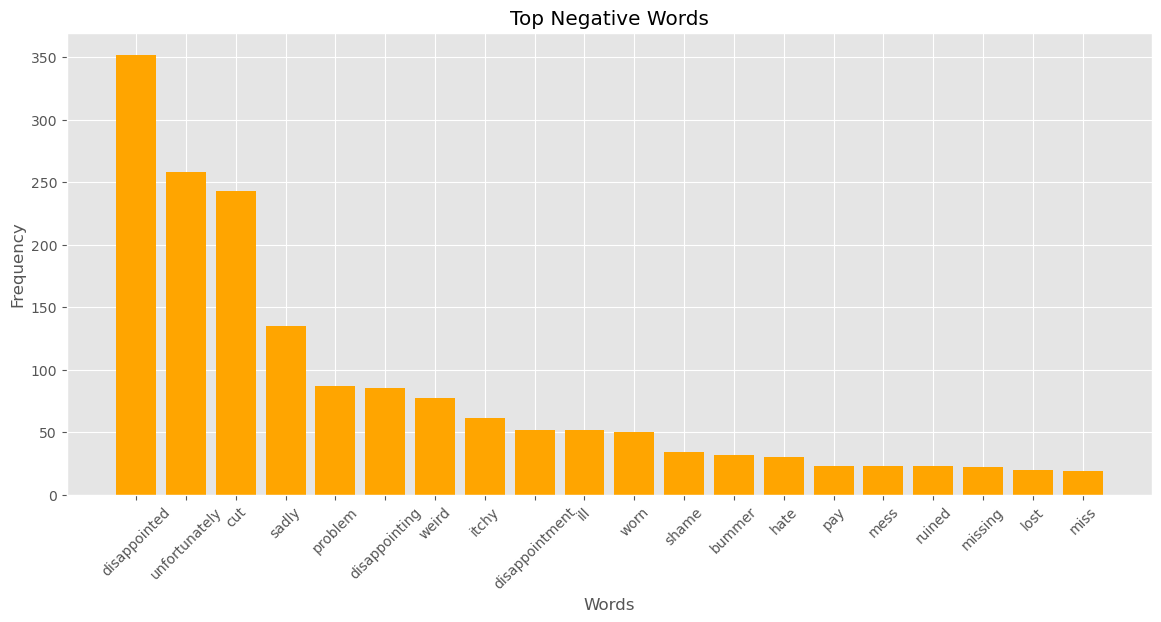

In [154]:
words = [word for word, freq in filtered_negative_word_freq]
frequencies = [freq for word, freq in filtered_negative_word_freq]

plt.figure(figsize=(14, 6))
plt.bar(words[:20], frequencies[:20], color='orange')  
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Negative Words")
plt.show()


- There are certain words that the reviewers keep on saying
- They are "disappointing", "itchy", "lost", "weird design"